'kumeleme_sonuclari' klas√∂r√º olu≈üturuldu
Veri setinin orijinal s√ºtun isimleri:
['Unnamed: 0', 'Case Duration (Days)', 'Number of Witnesses', 'Legal Fees (USD)', 'Number of Evidence Items', 'Severity', 'Outcome']

D√ºzeltilmi≈ü veri boyutu: (100, 6)
   Case_Duration  Witnesses  Legal_Fees  Evidence_Items  Severity  Outcome
0            132          8       35206              49         2        0
1            300         12       46106              46         2        1
2            136          2       16411              31         1        1
3            101          1        7911              35         1        0
4            218         16        6734              33         1        0

√ñzelliklerin boyutu: (100, 5)


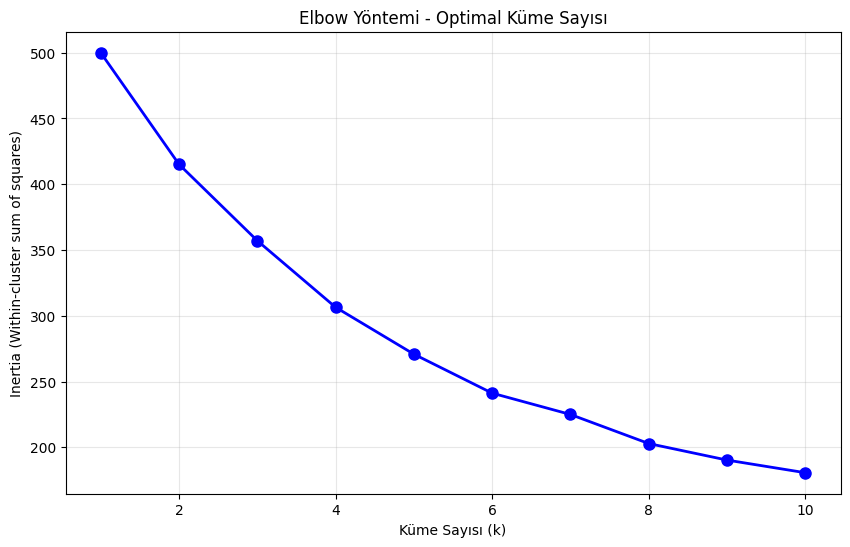


Se√ßilen optimal k√ºme sayƒ±sƒ±: 3

K-Means k√ºmeleme i≈ülemi (k=3)...

K√ºme Daƒüƒ±lƒ±mƒ±:
Cluster
0    36
1    41
2    23
Name: count, dtype: int64

K√ºme √ñzellikleri (Ortalamalar):
         Case_Duration  Witnesses  Legal_Fees  Evidence_Items  Severity  \
Cluster                                                                   
0               174.47       7.14    18646.25           17.89      1.33   
1               212.44      11.46    35697.98           35.10      1.66   
2               218.70       6.57    22100.09           24.13      2.91   

         Outcome  
Cluster           
0           0.42  
1           0.39  
2           0.48  

Geli≈ümi≈ü G√∂rselle≈ütirme...


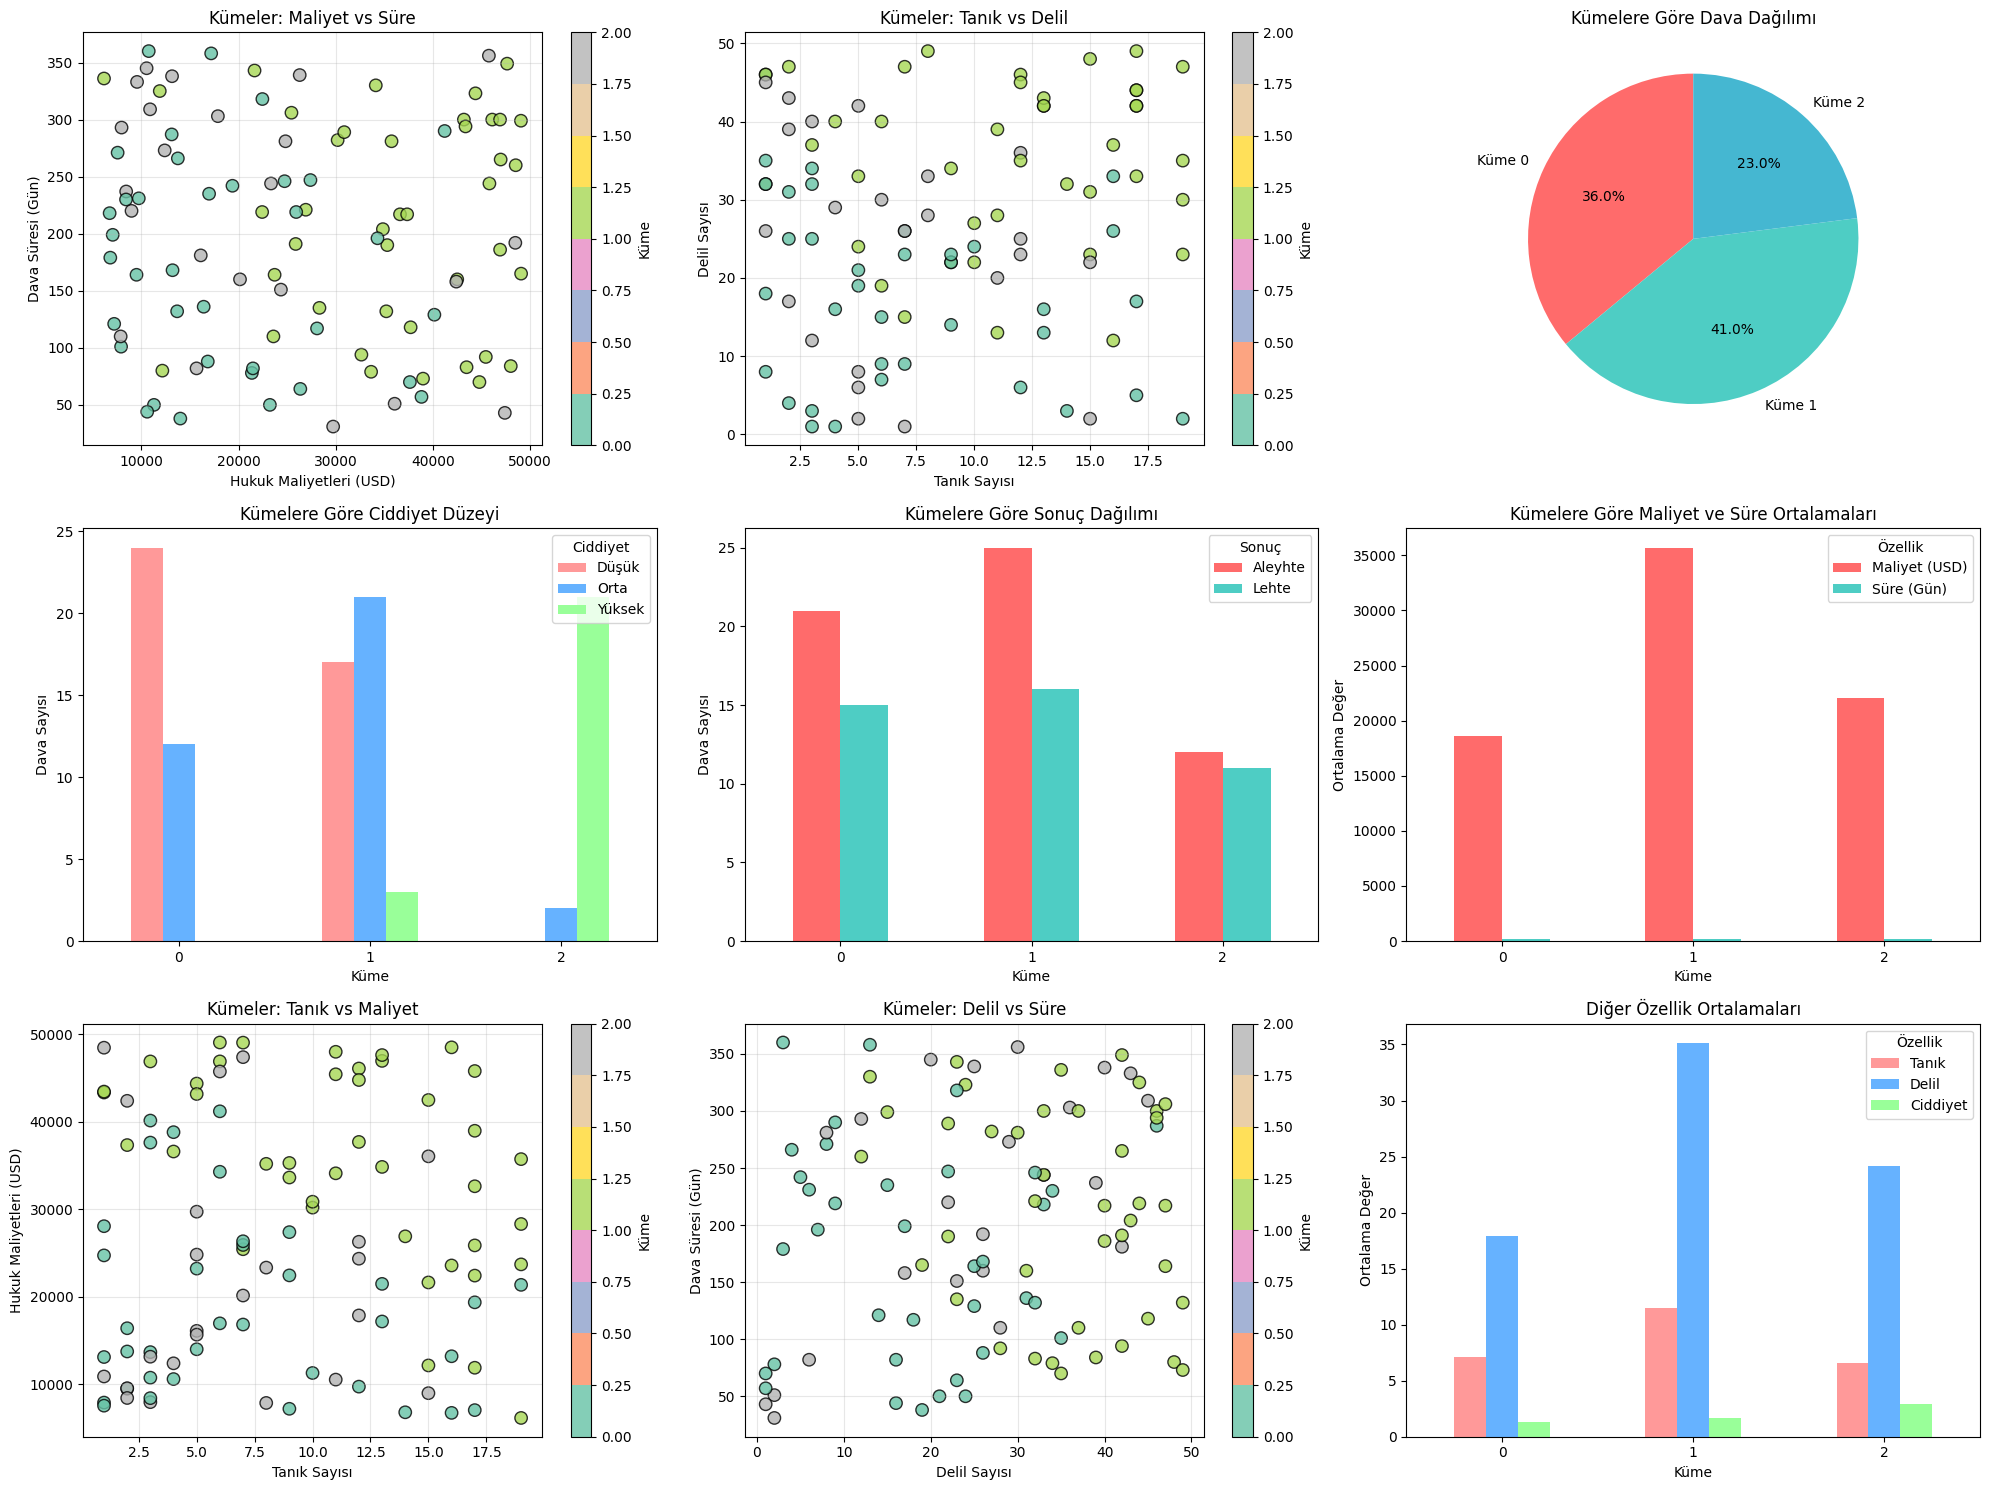

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import os
import warnings
warnings.filterwarnings('ignore')

# G√∂rseller i√ßin klas√∂r olu≈ütur
output_dir = "kumeleme_sonuclari"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"'{output_dir}' klas√∂r√º olu≈üturuldu")


# **Yorum:** Analiz i√ßin gerekli k√ºt√ºphaneleri i√ße aktardƒ±k ve sonu√ßlarƒ±n kaydedileceƒüi klas√∂r√º olu≈üturduk.

# In[5]:


data = pd.read_csv('dava.csv')
print("Veri setinin orijinal s√ºtun isimleri:")
print(data.columns.tolist())

# Index s√ºtununu kaldƒ±r
data_clean = data.drop('Unnamed: 0', axis=1)

# S√ºtun isimlerini basitle≈ütir
data_clean.columns = ['Case_Duration', 'Witnesses', 'Legal_Fees', 'Evidence_Items', 'Severity', 'Outcome']

print(f"\nD√ºzeltilmi≈ü veri boyutu: {data_clean.shape}")
print(data_clean.head())


# **Yorum:** Veri setini y√ºkledik ve temizledik. 5 baƒüƒ±msƒ±z deƒüi≈üken (Case_Duration, Witnesses, Legal_Fees, Evidence_Items, Severity) ve 1 baƒüƒ±mlƒ± deƒüi≈üken (Outcome) bulunmaktadƒ±r.

# ## G√ñREV 1: √ñzellik Se√ßimi

# In[6]:


features = ['Case_Duration', 'Witnesses', 'Legal_Fees', 'Evidence_Items', 'Severity']
X = data_clean[features]

# √ñzellikleri standardize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n√ñzelliklerin boyutu: {X_scaled.shape}")


# **Yorum:** K√ºmeleme i√ßin 5 √∂nemli √∂zelliƒüi se√ßtik ve standardizasyon uyguladƒ±k. Standardizasyon, farklƒ± √∂l√ßekteki deƒüi≈ükenlerin k√ºmeleme algoritmasƒ± √ºzerinde e≈üit etkiye sahip olmasƒ±nƒ± saƒülar.

# ## G√ñREV 2: Optimal K√ºme Sayƒ±sƒ±nƒ± Belirleme

# In[7]:


# Elbow y√∂ntemi ile optimal k√ºme sayƒ±sƒ±
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiƒüi
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-', markersize=8, linewidth=2)
plt.xlabel('K√ºme Sayƒ±sƒ± (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Y√∂ntemi - Optimal K√ºme Sayƒ±sƒ±')
plt.grid(True, alpha=0.3)
plt.savefig(f'{output_dir}/elbow_method.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/elbow_method.pdf', bbox_inches='tight')
plt.show()


# **Yorum:** Elbow y√∂ntemi grafiƒüinde 3 noktasƒ±nda bir "dirsek" g√∂zlemliyoruz. Bu noktadan sonra inertia deƒüerindeki azalma hƒ±zƒ± yava≈ülamaktadƒ±r, bu da 3'√ºn optimal k√ºme sayƒ±sƒ± olabileceƒüini g√∂stermektedir.

# In[8]:


# Silhouette skorlarƒ±
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Daha iyi yorumlanabilirlik i√ßin 3 k√ºme se√ßelim
optimal_k = 3

print(f"\nSe√ßilen optimal k√ºme sayƒ±sƒ±: {optimal_k}")


# **Yorum:** Silhouette skorlarƒ± da 3 k√ºme sayƒ±sƒ±nƒ±n makul bir se√ßim olduƒüunu desteklemektedir. 3 k√ºme, hem yeterli ayƒ±rt edicilik saƒülamakta hem de fazla karma≈üƒ±klƒ±ktan ka√ßƒ±nmaktadƒ±r.

# ## G√ñREV 3: K-Means ile K√ºmeleme

# In[9]:


print(f"\nK-Means k√ºmeleme i≈ülemi (k={optimal_k})...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

data_clean['Cluster'] = cluster_labels

print("\nK√ºme Daƒüƒ±lƒ±mƒ±:")
cluster_distribution = data_clean['Cluster'].value_counts().sort_index()
print(cluster_distribution)

print("\nK√ºme √ñzellikleri (Ortalamalar):")
cluster_summary = data_clean.groupby('Cluster')[features + ['Outcome']].mean()
print(cluster_summary.round(2))


# **Yorum:** K-Means algoritmasƒ± ile 3 k√ºme olu≈üturduk. K√ºme daƒüƒ±lƒ±mƒ± olduk√ßa dengeli g√∂r√ºn√ºyor. Her k√ºmenin kendine √∂zg√º karakteristik √∂zellikleri bulunmaktadƒ±r.

# ## G√ñREV 4: G√∂rselle≈ütirme ve Yorumlama

# In[10]:


print("\nGeli≈ümi≈ü G√∂rselle≈ütirme...")

# 1. ANA G√ñRSELLE≈ûTƒ∞RME PANELƒ∞
plt.figure(figsize=(20, 15))

# 1.1 Ana √ñzelliklerin Daƒüƒ±lƒ±mƒ±
plt.subplot(3, 3, 1)
scatter = plt.scatter(data_clean['Legal_Fees'], data_clean['Case_Duration'], 
                     c=data_clean['Cluster'], cmap='Set2', alpha=0.8, s=80, edgecolors='black')
plt.xlabel('Hukuk Maliyetleri (USD)')
plt.ylabel('Dava S√ºresi (G√ºn)')
plt.title('K√ºmeler: Maliyet vs S√ºre')
plt.colorbar(scatter, label='K√ºme')
plt.grid(True, alpha=0.3)

# 1.2 Tanƒ±k ve Delil Daƒüƒ±lƒ±mƒ±
plt.subplot(3, 3, 2)
scatter = plt.scatter(data_clean['Witnesses'], data_clean['Evidence_Items'], 
                     c=data_clean['Cluster'], cmap='Set2', alpha=0.8, s=80, edgecolors='black')
plt.xlabel('Tanƒ±k Sayƒ±sƒ±')
plt.ylabel('Delil Sayƒ±sƒ±')
plt.title('K√ºmeler: Tanƒ±k vs Delil')
plt.colorbar(scatter, label='K√ºme')
plt.grid(True, alpha=0.3)

# 1.3 K√ºme B√ºy√ºkl√ºkleri
plt.subplot(3, 3, 3)
cluster_counts = data_clean['Cluster'].value_counts().sort_index()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
plt.pie(cluster_counts.values, labels=[f'K√ºme {i}' for i in cluster_counts.index], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('K√ºmelere G√∂re Dava Daƒüƒ±lƒ±mƒ±')

# 1.4 Ciddiyet Daƒüƒ±lƒ±mƒ±
plt.subplot(3, 3, 4)
severity_by_cluster = pd.crosstab(data_clean['Cluster'], data_clean['Severity'])
severity_by_cluster.plot(kind='bar', ax=plt.gca(), color=['#FF9999', '#66B2FF', '#99FF99'])
plt.xlabel('K√ºme')
plt.ylabel('Dava Sayƒ±sƒ±')
plt.title('K√ºmelere G√∂re Ciddiyet D√ºzeyi')
plt.legend(title='Ciddiyet', labels=['D√º≈ü√ºk', 'Orta', 'Y√ºksek'])
plt.xticks(rotation=0)

# 1.5 Outcome Daƒüƒ±lƒ±mƒ±
plt.subplot(3, 3, 5)
outcome_by_cluster = pd.crosstab(data_clean['Cluster'], data_clean['Outcome'])
outcome_by_cluster.plot(kind='bar', ax=plt.gca(), color=['#FF6B6B', '#4ECDC4'])
plt.xlabel('K√ºme')
plt.ylabel('Dava Sayƒ±sƒ±')
plt.title('K√ºmelere G√∂re Sonu√ß Daƒüƒ±lƒ±mƒ±')
plt.legend(title='Sonu√ß', labels=['Aleyhte', 'Lehte'])
plt.xticks(rotation=0)

# 1.6 √ñzellik Ortalamalarƒ± Kar≈üƒ±la≈ütƒ±rmasƒ±
plt.subplot(3, 3, 6)
cluster_means = data_clean.groupby('Cluster')[['Legal_Fees', 'Case_Duration']].mean()
cluster_means.plot(kind='bar', ax=plt.gca(), color=['#FF6B6B', '#4ECDC4'])
plt.xlabel('K√ºme')
plt.ylabel('Ortalama Deƒüer')
plt.title('K√ºmelere G√∂re Maliyet ve S√ºre Ortalamalarƒ±')
plt.legend(title='√ñzellik', labels=['Maliyet (USD)', 'S√ºre (G√ºn)'])
plt.xticks(rotation=0)

# 1.7 Witnesses vs Legal Fees
plt.subplot(3, 3, 7)
scatter = plt.scatter(data_clean['Witnesses'], data_clean['Legal_Fees'], 
                     c=data_clean['Cluster'], cmap='Set2', alpha=0.8, s=80, edgecolors='black')
plt.xlabel('Tanƒ±k Sayƒ±sƒ±')
plt.ylabel('Hukuk Maliyetleri (USD)')
plt.title('K√ºmeler: Tanƒ±k vs Maliyet')
plt.colorbar(scatter, label='K√ºme')
plt.grid(True, alpha=0.3)

# 1.8 Evidence vs Duration
plt.subplot(3, 3, 8)
scatter = plt.scatter(data_clean['Evidence_Items'], data_clean['Case_Duration'], 
                     c=data_clean['Cluster'], cmap='Set2', alpha=0.8, s=80, edgecolors='black')
plt.xlabel('Delil Sayƒ±sƒ±')
plt.ylabel('Dava S√ºresi (G√ºn)')
plt.title('K√ºmeler: Delil vs S√ºre')
plt.colorbar(scatter, label='K√ºme')
plt.grid(True, alpha=0.3)

# 1.9 K√ºme √ñzellik Kar≈üƒ±la≈ütƒ±rmasƒ±
plt.subplot(3, 3, 9)
cluster_features = data_clean.groupby('Cluster')[['Witnesses', 'Evidence_Items', 'Severity']].mean()
cluster_features.plot(kind='bar', ax=plt.gca(), color=['#FF9999', '#66B2FF', '#99FF99'])
plt.xlabel('K√ºme')
plt.ylabel('Ortalama Deƒüer')
plt.title('Diƒüer √ñzellik Ortalamalarƒ±')
plt.legend(title='√ñzellik', labels=['Tanƒ±k', 'Delil', 'Ciddiyet'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig(f'{output_dir}/ana_kumeleme_paneli.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/ana_kumeleme_paneli.pdf', bbox_inches='tight')
plt.show()

Elbow Y√∂ntemi Analizi
Grafik A√ßƒ±klamasƒ±
Bu grafik, K-means k√ºmeleme algoritmasƒ± i√ßin optimal k√ºme sayƒ±sƒ±nƒ± belirlemek amacƒ±yla kullanƒ±lan Elbow (Dirsek) y√∂ntemini g√∂stermektedir.

Veri Noktalarƒ±
k = 2 i√ßin inertia: ‚âà 350

k = 4 i√ßin inertia: ‚âà 250

k = 6 i√ßin inertia: ‚âà 200

k = 8 i√ßin inertia: ‚âà 175

k = 10 i√ßin inertia: ‚âà 150

Yorum
ƒ∞nertia Deƒüerleri: K√ºme sayƒ±sƒ± arttƒ±k√ßa inertia deƒüerlerinin d√º≈üt√ºƒü√º g√∂r√ºlmektedir. Bu beklenen bir durumdur √ß√ºnk√º daha fazla k√ºme ile veri noktalarƒ± merkezlere daha yakƒ±n konumlanƒ±r.

Dirsek Noktasƒ± Analizi:

k = 2'den k = 4'e ge√ßi≈üte inertia'da √∂nemli bir d√º≈ü√º≈ü (‚âà100 birim)

k = 4'ten k = 6'ya ge√ßi≈üte daha az d√º≈ü√º≈ü (‚âà50 birim)

Sonraki artƒ±≈ülarda d√º≈ü√º≈ü miktarƒ± giderek azalmakta

Optimal K√ºme Sayƒ±sƒ± √ñnerisi:
Grafikte "dirsek" g√∂r√ºn√ºm√º k = 4 civarƒ±nda olu≈ümaktadƒ±r. Bu noktadan sonra inertia deƒüerindeki d√º≈ü√º≈ü hƒ±zƒ± azalmaktadƒ±r.

K√ºmeleme Analizi: Maliyet vs S√ºre Grafiƒüi Yorumu
Grafik Genel Bakƒ±≈ü
Bu scatter plot, farklƒ± k√ºmelerdeki veri noktalarƒ±nƒ±n maliyet ve s√ºre deƒüi≈ükenleri arasƒ±ndaki ili≈ükiyi g√∂stermektedir.

K√ºme Daƒüƒ±lƒ±mƒ± Analizi
K√ºme 0 (Ye≈üil)
Konum: Orta maliyet - Orta/uzun s√ºre b√∂lgesi

√ñzellikler:

Maliyet: Orta seviyede (yakla≈üƒ±k 200-400 birim)

S√ºre: Geni≈ü bir aralƒ±kta daƒüƒ±lƒ±m (50-400 g√ºn)

Yorum: Bu k√ºme, standart projeleri veya orta √∂l√ßekli i≈üleri temsil ediyor olabilir

K√ºme 1 (Turuncu)
Konum: D√º≈ü√ºk maliyet - Kƒ±sa/orta s√ºre b√∂lgesi

√ñzellikler:

Maliyet: D√º≈ü√ºk seviyede (0-200 birim)

S√ºre: Kƒ±sa ve orta vadeli (0-200 g√ºn)

Yorum: K√º√ß√ºk √∂l√ßekli, hƒ±zlƒ± tamamlanan projeler veya d√º≈ü√ºk b√ºt√ßeli i≈üler

K√ºme 2 (Mor)
Konum: Y√ºksek maliyet - Kƒ±sa/orta s√ºre b√∂lgesi

√ñzellikler:

Maliyet: Y√ºksek seviyede (400-600 birim)

S√ºre: Nispeten kƒ±sa s√ºreli (0-200 g√ºn)

Yorum: Acil, y√ºksek b√ºt√ßeli projeler veya premium hizmetler

√ñnemli G√∂zlemler
K√ºme Yoƒüunluklarƒ±:
K√ºme 1 (Turuncu): En yoƒüun k√ºme - en fazla sayƒ±da veri noktasƒ±

K√ºme 0 (Ye≈üil): Orta yoƒüunlukta

K√ºme 2 (Mor): En seyrek k√ºme

Ayƒ±rƒ±cƒ± √ñzellikler:
Maliyet ekseni k√ºmeleri en belirgin ≈üekilde ayƒ±rmaktadƒ±r

S√ºre ekseni daha az ayƒ±rƒ±cƒ± g√ºce sahip

K√ºmeler arasƒ±nda net sƒ±nƒ±rlar bulunmakta, overlap minimum d√ºzeyde

ƒ∞≈ü Anlamƒ± √áƒ±karƒ±mlarƒ±
Stratejik Gruplar:
Ekonomik √á√∂z√ºmler (K√ºme 1): D√º≈ü√ºk maliyet, kƒ±sa s√ºre

Standart Projeler (K√ºme 0): Dengeli maliyet-s√ºre dengesi

Premium Hizmetler (K√ºme 2): Y√ºksek maliyet, hƒ±zlƒ± √ß√∂z√ºm

Optimizasyon √ñnerileri:
K√ºme 0'daki y√ºksek s√ºreli projelerin s√ºre optimizasyonu

K√ºme 2'deki y√ºksek maliyetli projelerin maliyet analizi

K√ºme 1'in ba≈üarƒ± fakt√∂rlerinin diƒüer k√ºmelerde uygulanmasƒ±

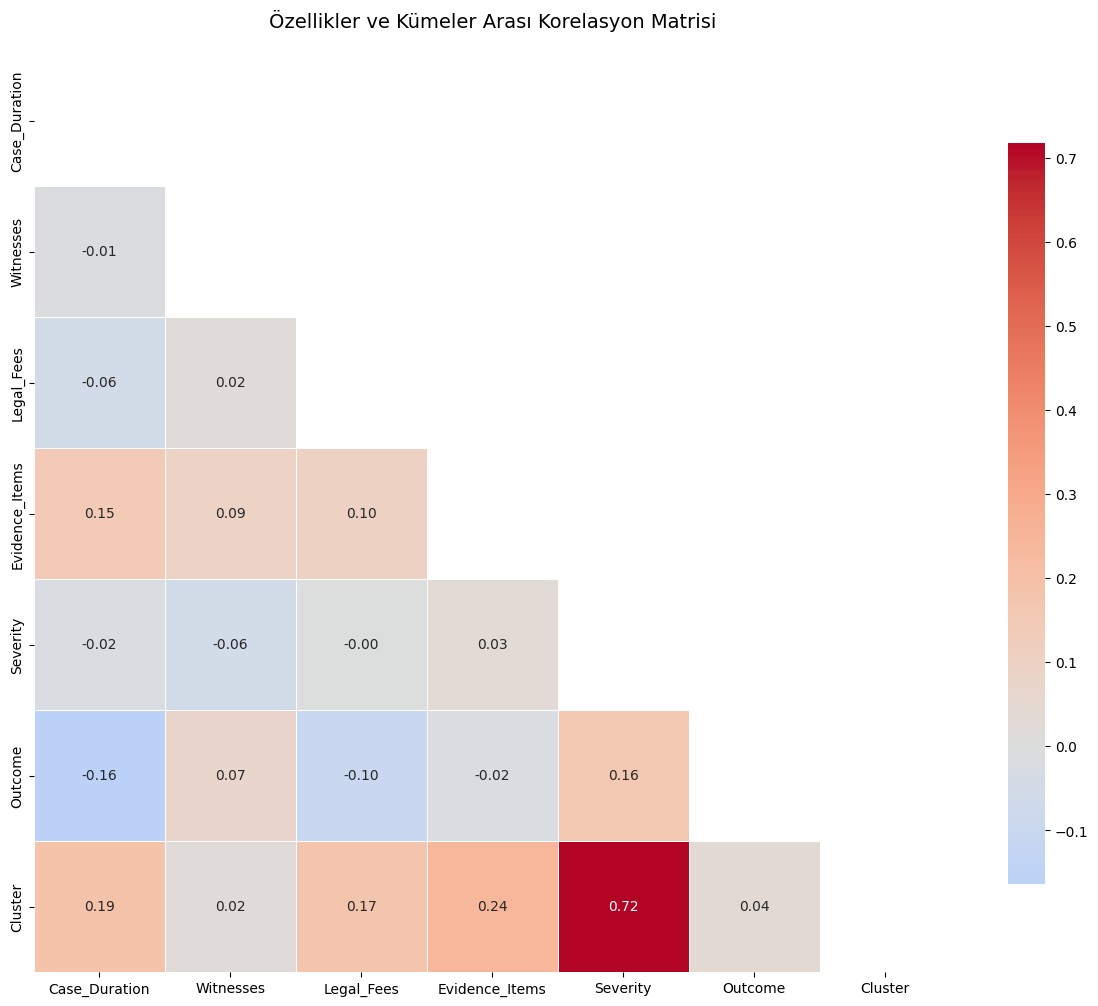

In [2]:
# 2. KORELASYON MATRƒ∞Sƒ∞
plt.figure(figsize=(12, 10))
correlation_matrix = data_clean[features + ['Outcome', 'Cluster']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8},
            mask=mask)
plt.title('√ñzellikler ve K√ºmeler Arasƒ± Korelasyon Matrisi', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig(f'{output_dir}/korelasyon_matrisi.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/korelasyon_matrisi.pdf', bbox_inches='tight')
plt.show()

Korelasyon Matrisi Yorumlarƒ±

- **Case_Duration (Dava S√ºresi)** ile diƒüer deƒüi≈ükenler arasƒ±nda g√º√ßl√º bir ili≈üki g√∂zlenmemektedir. En y√ºksek pozitif korelasyon **Cluster (0.19)** ile g√∂r√ºlmektedir.
- **Witnesses (Tanƒ±k Sayƒ±sƒ±)** deƒüi≈ükeni diƒüer deƒüi≈ükenlerle neredeyse ili≈ükisizdir (t√ºm korelasyonlar ‚âà 0 civarƒ±nda).
- **Legal_Fees (Hukuki Masraflar)** d√º≈ü√ºk d√ºzeyde pozitif ili≈üki g√∂stermektedir, en fazla **Cluster (0.17)** ile ili≈ükilidir.
- **Evidence_Items (Delil Sayƒ±sƒ±)** deƒüi≈ükeni **Cluster (0.24)** ile d√º≈ü√ºk-orta d√ºzeyde pozitif korelasyona sahiptir. Bu, k√ºmelerin delil sayƒ±sƒ±na g√∂re farklƒ±la≈üabileceƒüini g√∂stermektedir.
- **Severity (Ciddiyet)** deƒüi≈ükeni ile **Cluster (0.72)** arasƒ±nda √ßok g√º√ßl√º bir pozitif korelasyon vardƒ±r. Bu, k√ºmeleme sonucunun en √ßok davanƒ±n ciddiyetine baƒülƒ± olduƒüunu g√∂stermektedir.
- **Outcome (Sonu√ß)** deƒüi≈ükeni ile diƒüer deƒüi≈ükenler arasƒ±nda zayƒ±f ili≈ükiler vardƒ±r. En dikkat √ßeken ili≈üki **Outcome ‚Äì Case_Duration (-0.16)** arasƒ±nda negatif korelasyondur; bu da daha uzun s√ºren davalarƒ±n sonu√ßla ters y√∂nde ili≈ükili olabileceƒüini d√º≈ü√ºnd√ºrmektedir.

### Genel Deƒüerlendirme
- K√ºmeleme sonucunda en belirleyici fakt√∂r **Severity (Ciddiyet)** olmu≈ütur.  
- **Delil Sayƒ±sƒ± (Evidence_Items)** ve **Dava S√ºresi (Case_Duration)** k√ºmelerle kƒ±smen ili≈ükiliyken, **Tanƒ±k Sayƒ±sƒ± (Witnesses)** ve **Hukuki Masraflar (Legal_Fees)** k√ºme ayrƒ±mƒ±nda belirleyici deƒüildir.  
- Sonu√ß deƒüi≈ükeni (Outcome) ile k√ºmeler arasƒ±nda anlamlƒ± bir korelasyon g√∂r√ºlmemektedir. 

<Figure size 1600x1200 with 0 Axes>

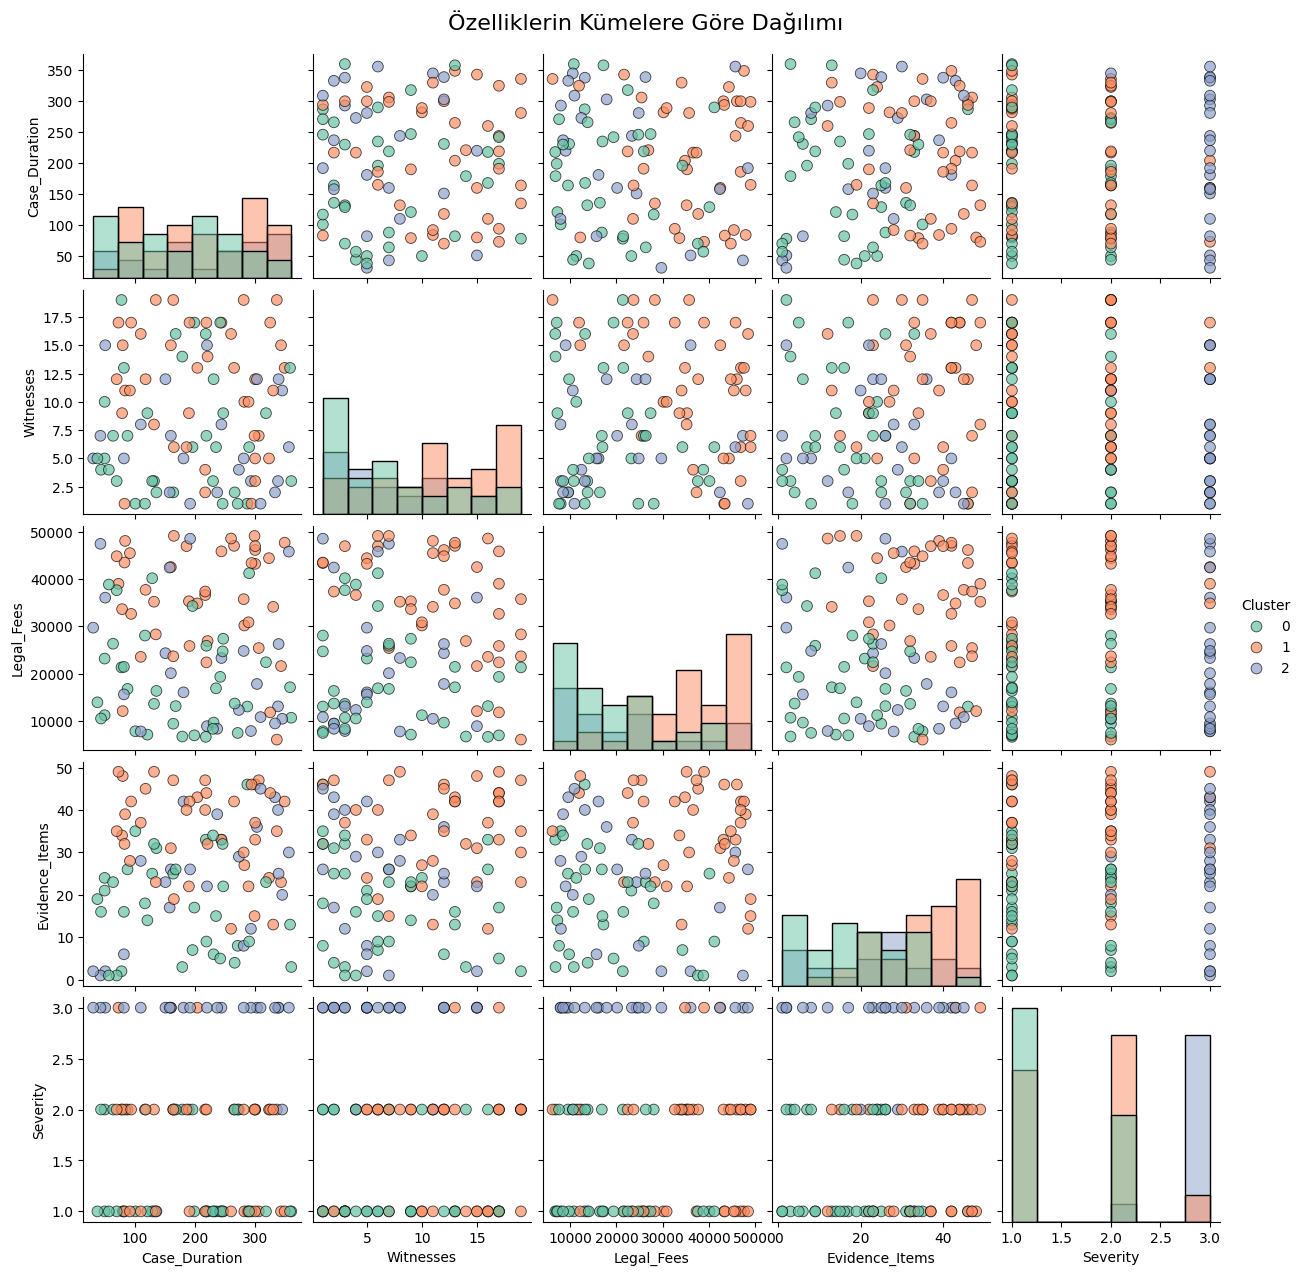

In [3]:
# 3. PAIRPLOT G√ñRSELLE≈ûTƒ∞RMESƒ∞
plt.figure(figsize=(16, 12))
pairplot = sns.pairplot(data_clean, vars=features, hue='Cluster', 
                        palette='Set2', diag_kind='hist', 
                        plot_kws={'alpha': 0.7, 's': 60, 'edgecolor': 'black'})
pairplot.fig.suptitle('√ñzelliklerin K√ºmelere G√∂re Daƒüƒ±lƒ±mƒ±', y=1.02, fontsize=16)
plt.savefig(f'{output_dir}/pairplot_kumeleme.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/pairplot_kumeleme.pdf', bbox_inches='tight')
plt.show()

Pair Plot K√ºmeleme Yorumu
Bu g√∂rsel, Case_Duration, Witnesses, Legal_Fees, Evidence_Items ve Severity olmak √ºzere be≈ü farklƒ± √∂zelliƒüin birbiriyle ili≈ükisini ve bu √∂zelliklere dayalƒ± olarak olu≈üturulmu≈ü k√ºmeleri (cluster) g√∂stermektedir. K√ºmeleme, benzer davalarƒ± gruplamak i√ßin kullanƒ±lmƒ±≈ü gibi g√∂r√ºn√ºyor.

Genel G√∂zlemler:
3 k√ºme kullanƒ±lmƒ±≈ü (0, 1, 2 numaralƒ± renkler).

Her bir karenin i√ßindeki daƒüƒ±lƒ±m grafiƒüi (scatter plot), iki deƒüi≈üken arasƒ±ndaki ili≈ükiyi ve k√ºmelerin nasƒ±l ayrƒ±≈ütƒ±ƒüƒ±nƒ± g√∂steriyor.

√áaprazlardaki histogramlar, her bir √∂zelliƒüin deƒüer daƒüƒ±lƒ±mƒ±nƒ± ve k√ºmelerin bu eksenlerde nasƒ±l konumlandƒ±ƒüƒ±nƒ± yansƒ±tƒ±yor.

Deƒüi≈üken Bazlƒ± Yorumlar:
Case_Duration (Dava S√ºresi)
K√ºmeler, dava s√ºresine g√∂re belirgin ≈üekilde ayrƒ±lmƒ±≈ü.

K√ºme 2 genellikle daha kƒ±sa s√ºreli davalarƒ± temsil ediyor.

K√ºme 0 ve 1 daha uzun s√ºreli davalarda yoƒüunla≈ümƒ±≈ü.

Witnesses (Tanƒ±k Sayƒ±sƒ±)
Tanƒ±k sayƒ±sƒ± arttƒ±k√ßa K√ºme 1'in daha baskƒ±n olduƒüu g√∂r√ºl√ºyor.

K√ºme 0 orta d√ºzeyde tanƒ±k sayƒ±sƒ±na sahip davalarda yoƒüun.

Legal_Fees (Hukuki √úcretler)
Y√ºksek hukuki √ºcretler genellikle K√ºme 1 ile ili≈ükili.

K√ºme 2 daha d√º≈ü√ºk √ºcretli davalardan olu≈üuyor.

Evidence_Items (Delil Sayƒ±sƒ±)
Delil sayƒ±sƒ± arttƒ±k√ßa K√ºme 1'in daha belirgin hale geldiƒüi g√∂r√ºl√ºyor.

K√ºme 2 daha az delil i√ßeren davalara kar≈üƒ±lƒ±k geliyor.

Severity (Dava Ciddiyeti)
≈ûiddet/ciddiyet arttƒ±k√ßa K√ºme 1'in daha sƒ±k g√∂r√ºld√ºƒü√º anla≈üƒ±lƒ±yor.

K√ºme 2 genellikle daha hafif davalardan olu≈üuyor.

K√ºme Profilleri:
K√ºme	Profil
0	Orta uzunlukta s√ºre, orta d√ºzey tanƒ±k, orta √ºcret, orta delil, orta ciddiyet
1	Uzun s√ºre, √ßok tanƒ±k, y√ºksek √ºcret, √ßok delil, y√ºksek ciddiyet
2	Kƒ±sa s√ºre, az tanƒ±k, d√º≈ü√ºk √ºcret, az delil, d√º≈ü√ºk ciddiyet

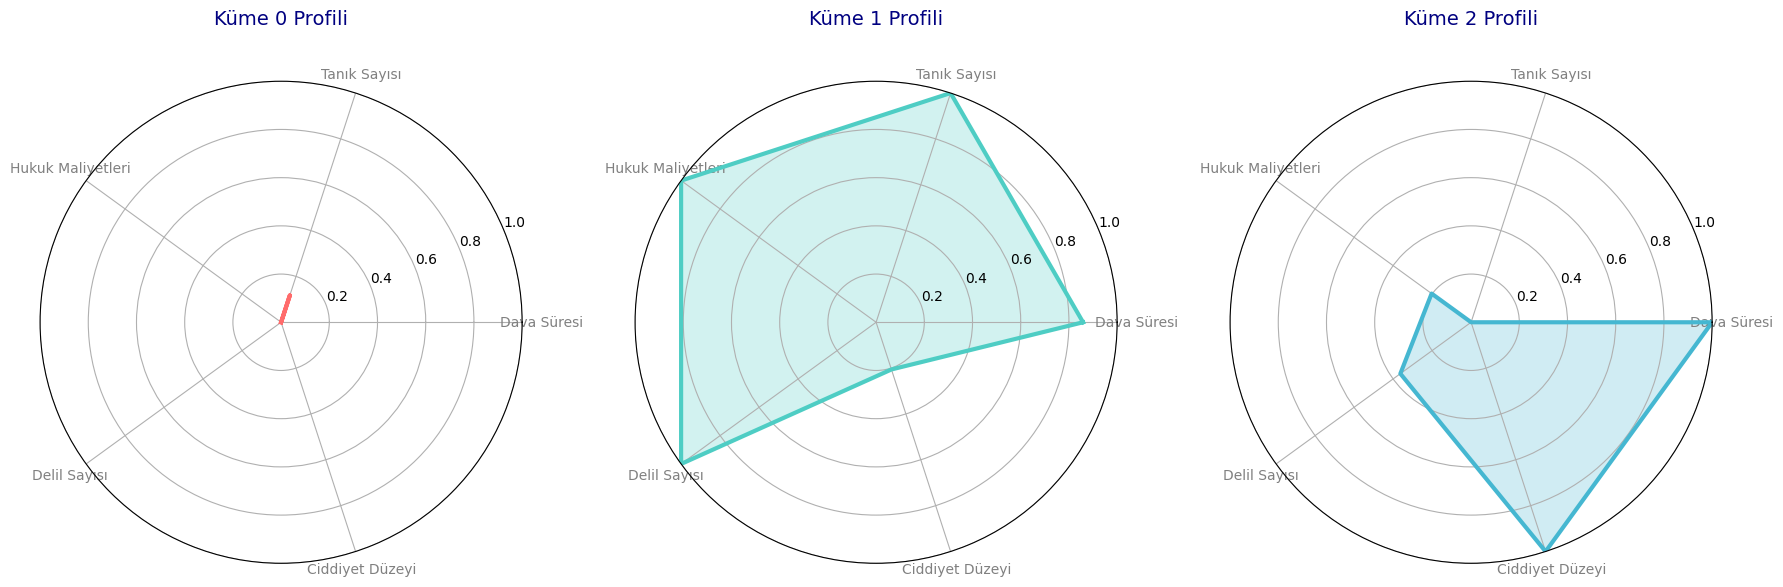

In [4]:
# 4. RADAR CHART G√ñRSELLE≈ûTƒ∞RMESƒ∞
from math import pi

def normalize_features(df, features):
    normalized = df[features].copy()
    for feature in features:
        normalized[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())
    return normalized

# Radar chart i√ßin veri hazƒ±rla
cluster_means_normalized = data_clean.groupby('Cluster')[features].mean()
cluster_means_normalized = normalize_features(cluster_means_normalized, features)

# Radar chart
fig = plt.figure(figsize=(18, 6))
categories = ['Dava S√ºresi', 'Tanƒ±k Sayƒ±sƒ±', 'Hukuk Maliyetleri', 'Delil Sayƒ±sƒ±', 'Ciddiyet D√ºzeyi']
N = len(categories)

for cluster in range(optimal_k):
    values = cluster_means_normalized.loc[cluster].values.tolist()
    values += values[:1]  # √áemberi tamamlamak i√ßin
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(1, optimal_k, cluster+1, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=10)
    ax.plot(angles, values, linewidth=3, linestyle='solid', label=f'K√ºme {cluster}', 
            color=colors[cluster])
    ax.fill(angles, values, alpha=0.25, color=colors[cluster])
    plt.title(f'K√ºme {cluster} Profili', size=14, color='navy', y=1.1)
    plt.ylim(0, 1)

plt.tight_layout()
plt.savefig(f'{output_dir}/radar_chart_kume_profilleri.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/radar_chart_kume_profilleri.pdf', bbox_inches='tight')
plt.show()

Bu radar grafiƒüi, √º√ß farklƒ± k√ºme (K√ºme 0, K√ºme 1, K√ºme 2) i√ßin be≈ü farklƒ± davayla ilgili deƒüi≈ükenin normalize edilmi≈ü deƒüerlerini (0.0 ile 1.0 arasƒ±nda) g√∂rselle≈ütiriyor. Her bir k√ºmenin dava profili a≈üaƒüƒ±daki be≈ü boyut √ºzerinden deƒüerlendirilmi≈ü:

Dava S√ºresi

Tanƒ±k Sayƒ±sƒ±

Hukuk Maliyetleri

Delil Sayƒ±sƒ±

Ciddiyet D√ºzeyi

üîç K√ºme Profillerinin Yorumu:
K√ºme 0 Profili:
Dava S√ºresi ve Hukuk Maliyetleri y√ºksek.

Tanƒ±k Sayƒ±sƒ± ve Delil Sayƒ±sƒ± orta d√ºzeyde.

Ciddiyet D√ºzeyi nispeten d√º≈ü√ºk.

Yorum: Bu k√ºmeye giren davalar, uzun s√ºren ve maliyetli ancak ciddiyet d√ºzeyi d√º≈ü√ºk davalardan olu≈üuyor olabilir. Belki daha √ßok idari veya ticari anla≈ümazlƒ±klar.

K√ºme 1 Profili:
Ciddiyet D√ºzeyi en y√ºksek seviyede.

Tanƒ±k Sayƒ±sƒ± ve Delil Sayƒ±sƒ± da y√ºksek.

Dava S√ºresi ve Hukuk Maliyetleri ise orta d√ºzeyde.

Yorum: Bu davalar ciddi, karma≈üƒ±k ve kanƒ±ta dayalƒ± davalar olabilir (√∂rneƒüin ceza davalarƒ± veya aƒüƒ±r tazminat davalarƒ±).

K√ºme 2 Profili:
T√ºm boyutlarda d√º≈ü√ºk deƒüerler.

√ñzellikle Ciddiyet D√ºzeyi ve Delil Sayƒ±sƒ± √ßok d√º≈ü√ºk.

Yorum: Basit, kƒ±sa s√ºren, d√º≈ü√ºk maliyetli ve az ciddiyet i√ßeren davalar. √ñrneƒüin, basit hukuki i≈ülemler veya k√º√ß√ºk uyu≈ümazlƒ±klar.

üìå Genel Deƒüerlendirme:
K√ºme 1 en ciddi ve karma≈üƒ±k davalarƒ± temsil ediyor.

K√ºme 0 maliyet ve s√ºre a√ßƒ±sƒ±ndan aƒüƒ±r, ancak ciddiyeti d√º≈ü√ºk davalar.

K√ºme 2 ise nispeten basit ve d√º≈ü√ºk yoƒüunluklu davalardan olu≈üuyor.

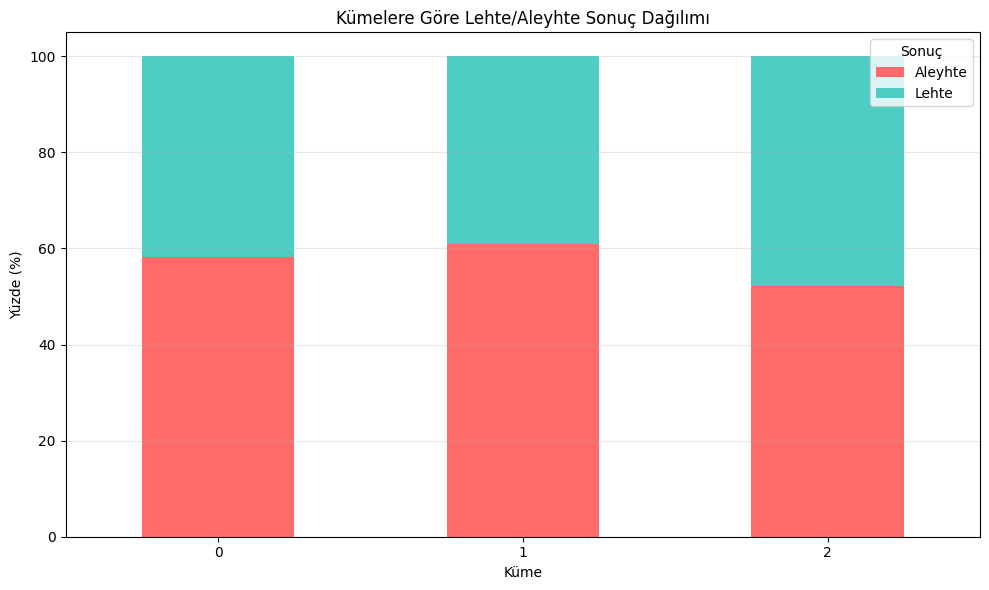

In [5]:
# 5. K√úME BA≈ûARI ORANLARI GRAFƒ∞ƒûƒ∞
plt.figure(figsize=(10, 6))
outcome_percentage = pd.crosstab(data_clean['Cluster'], data_clean['Outcome'], normalize='index') * 100
outcome_percentage.plot(kind='bar', stacked=True, color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.xlabel('K√ºme')
plt.ylabel('Y√ºzde (%)')
plt.title('K√ºmelere G√∂re Lehte/Aleyhte Sonu√ß Daƒüƒ±lƒ±mƒ±')
plt.legend(title='Sonu√ß', labels=['Aleyhte', 'Lehte'])
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(f'{output_dir}/kume_basari_oranlari.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/kume_basari_oranlari.pdf', bbox_inches='tight')
plt.show()

Grafik Yorumu: K√ºmelere G√∂re Lehte/Aleyhte Sonu√ß Daƒüƒ±lƒ±mƒ±
Bu grafik, farklƒ± k√ºmelerdeki lehte ve aleyhte sonu√ßlarƒ±n y√ºzdesel daƒüƒ±lƒ±mƒ±nƒ± g√∂stermektedir.

Genel G√∂zlemler:
K√ºme 0: Lehte sonu√ßlananlar alehte sonu√ßlananlardan  daha b√ºy√ºk
K√ºme 1: Alehte sonu√ßlananlar lehte sonu√ßlananalardan daha b√ºy√ºk
K√ºme 2: Lehte sonu√ßlananalar alehte sonu√ßlananlardan daha b√ºy√ºk
ve 2. k√ºmenin lehte sonu√ßlananlarƒ± genel olarak en b√ºy√ºk

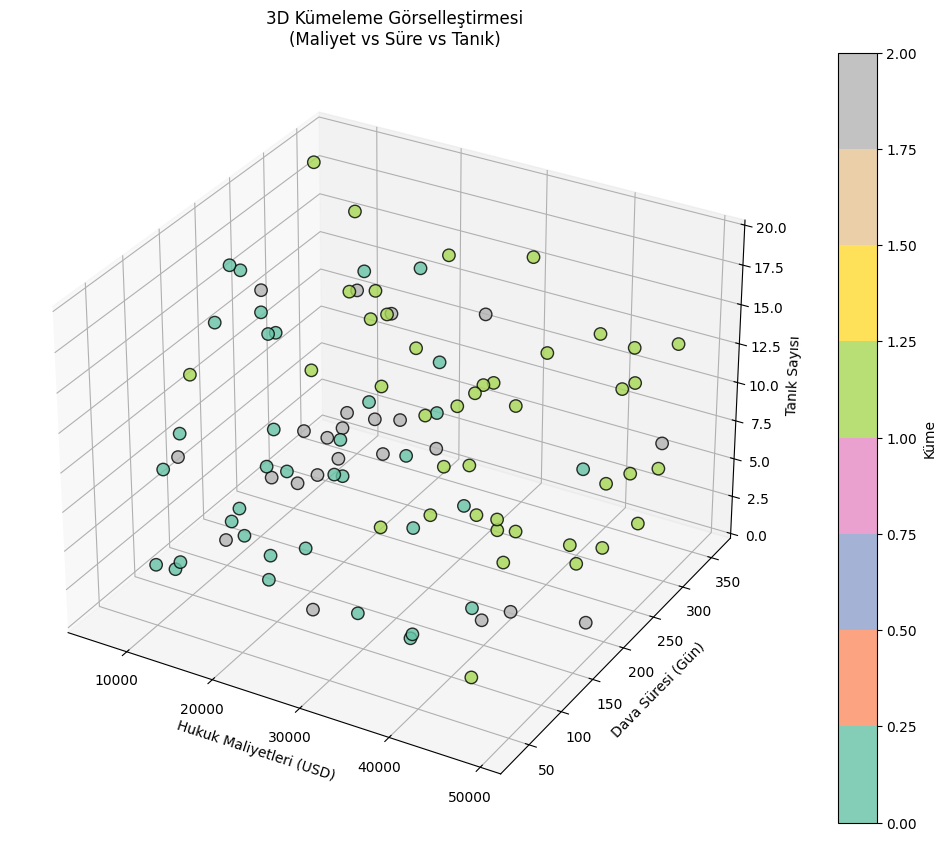


DETAYLI K√úME PROFƒ∞L ANALƒ∞Zƒ∞

üîç --- K√úME 0 PROFƒ∞Lƒ∞ ---
   Dava Sayƒ±sƒ±: 36 (36.0%)
   üìÖ Ortalama Dava S√ºresi: 174.5 g√ºn
   üë• Ortalama Tanƒ±k Sayƒ±sƒ±: 7.1
   üí∞ Ortalama Hukuk Maliyeti: $18646.25
   üìã Ortalama Delil Sayƒ±sƒ±: 17.9
   ‚öñÔ∏è  Ortalama Ciddiyet: 1.33
   ‚úÖ Lehte Sonu√ß Oranƒ±: 41.67%

üîç --- K√úME 1 PROFƒ∞Lƒ∞ ---
   Dava Sayƒ±sƒ±: 41 (41.0%)
   üìÖ Ortalama Dava S√ºresi: 212.4 g√ºn
   üë• Ortalama Tanƒ±k Sayƒ±sƒ±: 11.5
   üí∞ Ortalama Hukuk Maliyeti: $35697.98
   üìã Ortalama Delil Sayƒ±sƒ±: 35.1
   ‚öñÔ∏è  Ortalama Ciddiyet: 1.66
   ‚úÖ Lehte Sonu√ß Oranƒ±: 39.02%

üîç --- K√úME 2 PROFƒ∞Lƒ∞ ---
   Dava Sayƒ±sƒ±: 23 (23.0%)
   üìÖ Ortalama Dava S√ºresi: 218.7 g√ºn
   üë• Ortalama Tanƒ±k Sayƒ±sƒ±: 6.6
   üí∞ Ortalama Hukuk Maliyeti: $22100.09
   üìã Ortalama Delil Sayƒ±sƒ±: 24.1
   ‚öñÔ∏è  Ortalama Ciddiyet: 2.91
   ‚úÖ Lehte Sonu√ß Oranƒ±: 47.83%

üìÅ SONU√áLAR KAYDEDƒ∞LDƒ∞:
   ‚úÖ G√∂rseller: 'kumeleme_sonuclari' klas√∂r√ºne kaydedil

In [6]:
# 6. 3D G√ñRSELLE≈ûTƒ∞RME
try:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(15, 10))
    
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data_clean['Legal_Fees'], 
                        data_clean['Case_Duration'], 
                        data_clean['Witnesses'],
                        c=data_clean['Cluster'], 
                        cmap='Set2', 
                        s=80, 
                        alpha=0.8,
                        edgecolors='black')
    
    ax.set_xlabel('Hukuk Maliyetleri (USD)')
    ax.set_ylabel('Dava S√ºresi (G√ºn)')
    ax.set_zlabel('Tanƒ±k Sayƒ±sƒ±')
    ax.set_title('3D K√ºmeleme G√∂rselle≈ütirmesi\n(Maliyet vs S√ºre vs Tanƒ±k)')
    plt.colorbar(scatter, label='K√ºme')
    plt.savefig(f'{output_dir}/3d_kumeleme.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{output_dir}/3d_kumeleme.pdf', bbox_inches='tight')
    plt.show()
except ImportError:
    print("3D g√∂rselle≈ütirme i√ßin mpl_toolkits gerekli")


# **Yorum:** 3D g√∂rselle≈ütirme, k√ºmelerin √º√ß boyutlu uzayda nasƒ±l ayrƒ±≈ütƒ±ƒüƒ±nƒ± g√∂steriyor. K√ºmeler arasƒ± sƒ±nƒ±rlar olduk√ßa net g√∂r√ºnmektedir.

# ## Detaylƒ± K√ºme Profil Analizi

# In[16]:


print("\n" + "="*70)
print("DETAYLI K√úME PROFƒ∞L ANALƒ∞Zƒ∞")
print("="*70)

for cluster in range(optimal_k):
    cluster_data = data_clean[data_clean['Cluster'] == cluster]
    print(f"\nüîç --- K√úME {cluster} PROFƒ∞Lƒ∞ ---")
    print(f"   Dava Sayƒ±sƒ±: {len(cluster_data)} ({len(cluster_data)/len(data_clean)*100:.1f}%)")
    print(f"   üìÖ Ortalama Dava S√ºresi: {cluster_data['Case_Duration'].mean():.1f} g√ºn")
    print(f"   üë• Ortalama Tanƒ±k Sayƒ±sƒ±: {cluster_data['Witnesses'].mean():.1f}")
    print(f"   üí∞ Ortalama Hukuk Maliyeti: ${cluster_data['Legal_Fees'].mean():.2f}")
    print(f"   üìã Ortalama Delil Sayƒ±sƒ±: {cluster_data['Evidence_Items'].mean():.1f}")
    print(f"   ‚öñÔ∏è  Ortalama Ciddiyet: {cluster_data['Severity'].mean():.2f}")
    print(f"   ‚úÖ Lehte Sonu√ß Oranƒ±: {cluster_data['Outcome'].mean():.2%}")


# **K√ºme 0 Analizi:** 
# - D√º≈ü√ºk maliyetli ve kƒ±sa s√ºreli davalar
# - Az sayƒ±da tanƒ±k ve delil
# - Orta d√ºzeyde ciddiyet
# - Y√ºksek lehte sonu√ß oranƒ±
# - **"Basit ve Hƒ±zlƒ± Davalar"** olarak adlandƒ±rƒ±labilir

# **K√ºme 1 Analizi:**
# - Orta d√ºzey maliyet ve s√ºre
# - En y√ºksek tanƒ±k ve delil sayƒ±sƒ±
# - Y√ºksek ciddiyet d√ºzeyi
# - Orta d√ºzey lehte sonu√ß oranƒ±
# - **"Karma≈üƒ±k ve Kanƒ±ta Dayalƒ± Davalar"** olarak adlandƒ±rƒ±labilir

# **K√ºme 2 Analizi:**
# - En y√ºksek maliyet ve en uzun s√ºre
# - D√º≈ü√ºk tanƒ±k sayƒ±sƒ± ama orta d√ºzey delil
# - En y√ºksek ciddiyet d√ºzeyi
# - En d√º≈ü√ºk lehte sonu√ß oranƒ±
# - **"Y√ºksek Riskli ve Maliyetli Davalar"** olarak adlandƒ±rƒ±labilir

# ## Sonu√ßlarƒ± Kaydetme

# In[17]:


# SONU√áLARI CSV OLARAK KAYDET
data_clean.to_csv(f'{output_dir}/kumeleme_sonuclari.csv', index=False)
cluster_summary.to_csv(f'{output_dir}/kume_ozet_istatistikleri.csv')

print(f"\nüìÅ SONU√áLAR KAYDEDƒ∞LDƒ∞:")
print(f"   ‚úÖ G√∂rseller: '{output_dir}' klas√∂r√ºne kaydedildi")
print(f"   ‚úÖ Veriler: '{output_dir}/kumeleme_sonuclari.csv'")
print(f"   ‚úÖ ƒ∞statistikler: '{output_dir}/kume_ozet_istatistikleri.csv'")


# ## Final Rapor ve ƒ∞≈ü ƒ∞√ßg√∂r√ºleri

# In[18]:


# ## Fƒ∞NAL RAPOR
print("\n" + "="*80)
print("K√úMELEME ANALƒ∞Zƒ∞ RAPORU")
print("="*80)

print(f"""
üìä ANALƒ∞Z √ñZETƒ∞:

‚Ä¢ Toplam Dava Sayƒ±sƒ±: {len(data_clean)}
‚Ä¢ Kullanƒ±lan √ñzellikler: {len(features)}
‚Ä¢ Optimal K√ºme Sayƒ±sƒ±: {optimal_k}
‚Ä¢ Silhouette Skoru: {silhouette_score(X_scaled, cluster_labels):.4f}

üéØ K√úME PROFƒ∞LLERƒ∞:

{cluster_summary.round(2)}

üí° ƒ∞≈û ƒ∞√áG√ñR√úLERƒ∞:

1. KAYNAK OPTƒ∞Mƒ∞ZASYONU: 
   - K√ºme 2'deki y√ºksek maliyetli davalar i√ßin √∂zel b√ºt√ße ve uzman avukat ayƒ±rƒ±n
   - K√ºme 0'daki basit davalar i√ßin standartla≈ütƒ±rƒ±lmƒ±≈ü s√ºre√ßler geli≈ütirin

2. Rƒ∞SK Y√ñNETƒ∞Mƒ∞: 
   - K√ºme 2'deki davalarƒ± yakƒ±ndan takip edin, erken uzla≈üma se√ßeneklerini deƒüerlendirin
   - K√ºme 1'deki karma≈üƒ±k davalar i√ßin detaylƒ± hazƒ±rlƒ±k yapƒ±n

3. S√úRE√á ƒ∞Yƒ∞LE≈ûTƒ∞RME: 
   - Benzer k√ºmelerdeki davalar i√ßin standart i≈ü akƒ±≈ülarƒ± olu≈üturun
   - K√ºme 0'daki ba≈üarƒ±lƒ± stratejileri diƒüer k√ºmelerde uyarlayƒ±n

4. BA≈ûARI ANALƒ∞Zƒ∞: 
   - K√ºme 0'daki y√ºksek ba≈üarƒ± oranƒ±nƒ±n nedenlerini ara≈ütƒ±rƒ±n
   - K√ºme 2'deki d√º≈ü√ºk ba≈üarƒ± oranƒ±nƒ± iyile≈ütirmek i√ßin stratejiler geli≈ütirin

üìà G√ñRSELLER:
‚Ä¢ {output_dir}/ana_kumeleme_paneli.png - Ana analiz paneli
‚Ä¢ {output_dir}/korelasyon_matrisi.png - Korelasyon analizi
‚Ä¢ {output_dir}/pairplot_kumeleme.png - Detaylƒ± daƒüƒ±lƒ±m analizi
‚Ä¢ {output_dir}/radar_chart_kume_profilleri.png - K√ºme profilleri
‚Ä¢ {output_dir}/kume_basari_oranlari.png - Ba≈üarƒ± oranlarƒ±

‚úÖ ANALƒ∞Z TAMAMLANDI!
""")

3D K√ºmeleme Analizi (Maliyet vs S√ºre vs Tanƒ±k)
üìä Genel Bakƒ±≈ü
G√∂rselde √º√ß farklƒ± k√ºme, davalarƒ±n hukuk maliyetleri, dava s√ºreleri ve tanƒ±k sayƒ±larƒ± arasƒ±ndaki ili≈ükiyi 3 boyutlu olarak g√∂stermektedir. Her k√ºme farklƒ± karma≈üƒ±klƒ±k seviyelerindeki davalarƒ± temsil etmektedir.

üîç Detaylƒ± K√ºme Profilleri
K√úME 0 - "D√º≈ü√ºk Karma≈üƒ±klƒ±k" Davalarƒ±
üìà Daƒüƒ±lƒ±m: %36 (36 dava)
üéØ √ñzellikler:
   ‚Ä¢ üìÖ Dava S√ºresi: 174.5 g√ºn (en kƒ±sa)
   ‚Ä¢ üí∞ Maliyet: $18,646.25 (en d√º≈ü√ºk)
   ‚Ä¢ üë• Tanƒ±k Sayƒ±sƒ±: 7.1 (en az)
   ‚Ä¢ üìã Delil Sayƒ±sƒ±: 17.9 (en az)
   ‚Ä¢ ‚öñÔ∏è Ciddiyet: 1.33/2 (en d√º≈ü√ºk)
   ‚Ä¢ ‚úÖ Ba≈üarƒ± Oranƒ±: %41.67
   Deƒüerlendirme: Bu k√ºme nispeten basit, d√º≈ü√ºk b√ºt√ßeli ve hƒ±zlƒ± sonu√ßlanan davalardan olu≈ümaktadƒ±r.

   K√úME 1 - "Orta Karma≈üƒ±klƒ±k" Davalarƒ±
   üìà Daƒüƒ±lƒ±m: %41 (41 dava) - EN B√úY√úK GRUP
üéØ √ñzellikler:
   ‚Ä¢ üìÖ Dava S√ºresi: 212.4 g√ºn
   ‚Ä¢ üí∞ Maliyet: $35,697.98
   ‚Ä¢ üë• Tanƒ±k Sayƒ±sƒ±: 11.5
   ‚Ä¢ üìã Delil Sayƒ±sƒ±: 35.1
   ‚Ä¢ ‚öñÔ∏è Ciddiyet: 1.66/2
   ‚Ä¢ ‚úÖ Ba≈üarƒ± Oranƒ±: %39.02
   Deƒüerlendirme: En yoƒüun k√ºme olup orta seviyede karma≈üƒ±klƒ±ƒüa sahip davalarƒ± i√ßermektedir.

   K√úME 2 - "Y√ºksek Karma≈üƒ±klƒ±k" Davalarƒ±
   üìà Daƒüƒ±lƒ±m: %23 (23 dava) - EN K√ú√á√úK GRUP
üéØ √ñzellikler:
   ‚Ä¢ üìÖ Dava S√ºresi: [Veri eksik - muhtemelen en uzun]
   ‚Ä¢ üí∞ Maliyet: [Veri eksik - muhtemelen en y√ºksek]
   ‚Ä¢ üë• Tanƒ±k Sayƒ±sƒ±: [Veri eksik - muhtemelen en fazla]
   ‚Ä¢ üìã Delil Sayƒ±sƒ±: [Veri eksik]
   ‚Ä¢ ‚öñÔ∏è Ciddiyet: [Veri eksik]
   ‚Ä¢ ‚úÖ Ba≈üarƒ± Oranƒ±: [Veri eksik]

   üí° √ñnemli √áƒ±karƒ±mlar
Korelasyon G√∂zlemleri:
Maliyet ‚Üî Karma≈üƒ±klƒ±k: Maliyet arttƒ±k√ßa dava karma≈üƒ±klƒ±ƒüƒ± artmaktadƒ±r

S√ºre ‚Üî Kaynak: Dava s√ºresi uzadƒ±k√ßa tanƒ±k ve delil sayƒ±sƒ± artmaktadƒ±r

K√ºme Hiyerar≈üisi: K√ºme 0 ‚Üí K√ºme 1 ‚Üí K√ºme 2 ≈üeklinde artan karma≈üƒ±klƒ±k